<a href="https://colab.research.google.com/github/marcyomacedo/MK/blob/master/Marcio_Macedo_da_Silva_Filho_04_exercicio_pratico_regressao_california.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercício Prático: Aprendizagem Supervisionada Regressão

## Predição de valor de imóvel para o estado da California

O objetivo nesse exercício é que vocês implementem regressores para predição de valores reais.

<div>
<img src="https://www.segurospromo.com.br/blog/wp-content/uploads/2020/07/cidades-da-california-los-angeles.jpg", width="640"/>
<div/>

# 1) Obtenção dos Dados

Carregando as bibliotecas essenciais e os dataset


In [ ]:
# bibliotecas numéricas numpy, pandas e para plot matplotlib e seaborn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.display import display, HTML
sns.set_style('darkgrid')

In [ ]:
# para o data set usaremos o exemplo contido no próprio scikit-learn
from sklearn.datasets import fetch_california_housing # procure no scikit qual é o dataset da california

california_dataset =  fetch_california_housing() # objeto dataset do scikit, transformar em pandas

O que é um dataset do scikit-learn?

Objeto e seu atributos

In [ ]:
# descrevendo os objetos
print('nomes de atributos', california_dataset.feature_names , '\n\n')
print('Descrição', california_dataset.DESCR , '\n\n')
print('dados', california_dataset.data, '\n\n')
print('target', california_dataset.target, '\n\n')
print('nome do arquivo','California', '\n\n')

nomes de atributos ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'] 


Descrição .. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 19

In [ ]:
# transformando em pandas DataFrame
dataset = pd.DataFrame(california_dataset.data, columns=california_dataset.feature_names)

# exibindo parte do dados
print(dataset.head(5))

   MedInc  HouseAge  AveRooms  ...  AveOccup  Latitude  Longitude
0  8.3252      41.0  6.984127  ...  2.555556     37.88    -122.23
1  8.3014      21.0  6.238137  ...  2.109842     37.86    -122.22
2  7.2574      52.0  8.288136  ...  2.802260     37.85    -122.24
3  5.6431      52.0  5.817352  ...  2.547945     37.85    -122.25
4  3.8462      52.0  6.281853  ...  2.181467     37.85    -122.25

[5 rows x 8 columns]


In [ ]:
# adicionando o 'target' variável objetivo ('preço') ao dataset
dataset['MEDV'] = california_dataset.target

print(dataset.head(5))

   MedInc  HouseAge  AveRooms  AveBedrms  ...  AveOccup  Latitude  Longitude   MEDV
0  8.3252      41.0  6.984127   1.023810  ...  2.555556     37.88    -122.23  4.526
1  8.3014      21.0  6.238137   0.971880  ...  2.109842     37.86    -122.22  3.585
2  7.2574      52.0  8.288136   1.073446  ...  2.802260     37.85    -122.24  3.521
3  5.6431      52.0  5.817352   1.073059  ...  2.547945     37.85    -122.25  3.413
4  3.8462      52.0  6.281853   1.081081  ...  2.181467     37.85    -122.25  3.422

[5 rows x 9 columns]


In [ ]:
# apresentando a função display para dataframes
display(dataset.head(5))

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MEDV
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


#2) Visulizando e dividindo os dados

### Organizando o dataset

In [ ]:
# Como habitualmente, dividimos o conjunto entre 'featuers/atributos' e 'targets/saídas'
array = dataset.values
print(type(array))
X = array[:,0:8]
y = array[:,8]

<class 'numpy.ndarray'>


In [ ]:
# para dividir automaticamente os dados
from sklearn.model_selection import train_test_split

# dividindo os dados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [ ]:
print("Formato de X_train: ",X_train.shape)
print("Formato de X_test: ", X_test.shape)
print("Formato de y_train: ",y_train.shape)
print("Formato de y_test",y_test.shape)

Formato de X_train:  (14448, 8)
Formato de X_test:  (6192, 8)
Formato de y_train:  (14448,)
Formato de y_test (6192,)


### Visualizando os **dados**

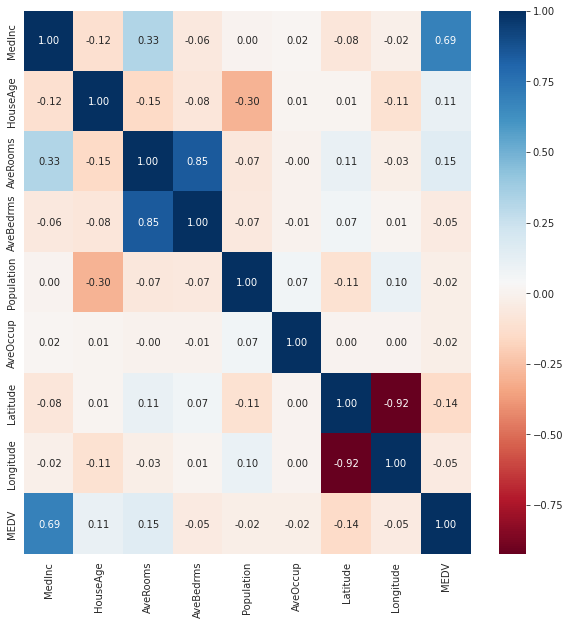

In [ ]:
# obtendo a estatítica de correlação
corr = dataset.corr()

# gerando o gráfico de 'heatmap' e plotando
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corr, cmap='RdBu', annot=True, fmt=".2f")

# definindo os 'labels' do gráfico
plt.xticks(np.arange(len(corr.columns))+0.5, corr.columns, ha="center")
plt.yticks(np.arange(len(corr.columns))+0.5, corr.columns, va='center')

#show plot
plt.show()

#3) Criando e treinando os modelos e avaliando os resultados

In [ ]:
# importando as funções de avaliação
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

Começando com o modelo LinearRegression

### Modelo Linear Regression

In [ ]:
# carregando o modelo
from sklearn.linear_model import LinearRegression

In [ ]:
model_1 = LinearRegression()
model_1.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# avaliar o desempenho de acurácia usando o cross-validation
cv_1 = cross_val_score(estimator=model_1, X=X_train, y=y_train, cv=10)

In [ ]:
# calcular o desempenho usando a métrica r2
y_pred_train_1 = model_1.predict(X_train)
r2_train_1 = r2_score(y_train, y_pred_train_1)

y_pred_test_1 = model_1.predict(X_test)
r2_test_1 = r2_score(y_test, y_pred_test_1)

In [ ]:
# calcular o desepenho usando RMSE
rmse_1 = (np.sqrt(mean_squared_error(y_test, y_pred_test_1)))

In [ ]:
# exibindo os resultados
print('Modelo Linear Regression\n')
print('CV: ', cv_1.mean())
print('R2 train:', r2_train_1)
print('R2 test:', r2_test_1)
print('RMSE:', rmse_1)

Modelo Linear Regression

CV:  0.4599619221124012
R2 train: 0.6076918551750623
R2 test: 0.6026225974777493
RMSE: 0.7359765711862573


### Modelo Decision Tree Regression

In [ ]:
# carregando o modelo
from sklearn.tree import DecisionTreeRegressor

In [ ]:
model_2 = DecisionTreeRegressor()
model_2.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
# avaliar o desempenho de acurácia usando o cross-validation
cv_2 = cross_val_score(estimator=model_2, X=X_train, y=y_train, cv=10)

In [ ]:
# calcular o desempenho usando a métrica r2
y_pred_train_2 = model_2.predict(X_train)
r2_train_2 = r2_score(y_train, y_pred_train_2)

y_pred_test_2 = model_2.predict(X_test)
r2_test_2 = r2_score(y_test, y_pred_test_2)

In [ ]:
# calcular o desepenho usando RMSE
rmse_2 = (np.sqrt(mean_squared_error(y_test, y_pred_test_2)))

In [ ]:
# exibindo os resultados
print('Modelo DecisionTreeRegression\n')
print('CV: ', cv_2.mean())
print('R2 train:', r2_train_2)
print('R2 test:', r2_test_2)
print('RMSE:', rmse_2)

Modelo DecisionTreeRegression

CV:  0.6188921478586502
R2 train: 0.9999999999999531
R2 test: 0.6062605063268167
RMSE: 0.7325999678953642


### Modelo Polynomial Regression de 2 ordem

In [ ]:
# carregando o modelo
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso

In [ ]:
poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(X_train)
poly_reg.fit(X_poly, y_train)

model_3 = LinearRegression()
# model_3.fit(X_poly, y_train)


In [ ]:
print(X_train.shape)

(14448, 8)


In [ ]:
print(X_poly.shape)

(14448, 45)


In [ ]:
lasso = Lasso().fit(X_poly,y_train)
model = SelectFromModel(lasso, prefit=True)
X_new = model.transform(X_poly)
X_new.shape

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3696.751848730158, tolerance: 1.9042929156251187
  positive)


(14448, 14)

In [ ]:
model_3.fit(X_new, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# avaliar o desempenho de acurácia usando o cross-validation
cv_3 = cross_val_score(estimator=model_3, X=X_new, y=y_train, cv=10)

# calcular o desempenho usando a métrica r2
# y_pred_train_3 = model_3.predict(X_poly)
y_pred_train_3 = model_3.predict(X_new)
r2_train_3 = r2_score(y_train, y_pred_train_3)

# y_pred_test_3 = model_3.predict(poly_reg.fit_transform(X_test))
y_pred_test_3 = model_3.predict(model.transform(poly_reg.fit_transform(X_test)))
r2_test_3 = r2_score(y_test, y_pred_test_3)

# calcular o desepenho usando RMSE
rmse_3 = (np.sqrt(mean_squared_error(y_test, y_pred_test_3)))

In [ ]:
# exibindo os resultados
print('Modelo Polynomial Regression\n')
print('CV: ', cv_3.mean())
print('R2 train:', r2_train_3)
print('R2 test:', r2_test_3)
print('RMSE:', rmse_3)

Modelo Polynomial Regression

CV:  -223.9598128889207
R2 train: 0.6194605144629459
R2 test: 0.6128639847054163
RMSE: 0.7264307068162082


# Outro Modelo de Sua Escolha 1

In [ ]:
from sklearn import linear_model

In [ ]:
model_4 = linear_model.BayesianRidge()

In [ ]:
model_4.fit(X_train, y_train)

BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, alpha_init=None,
              compute_score=False, copy_X=True, fit_intercept=True,
              lambda_1=1e-06, lambda_2=1e-06, lambda_init=None, n_iter=300,
              normalize=False, tol=0.001, verbose=False)

In [ ]:
# avaliar o desempenho de acurácia usando o cross-validation
cv_4 = cross_val_score(estimator=model_4, X=X_train, y=y_train, cv=10)

# calcular o desempenho usando a métrica r2
y_pred_train_4 = model_4.predict(X_train)
r2_train_4 = r2_score(y_train, y_pred_train_4)

y_pred_test_4 = model_4.predict(X_test)
r2_test_4 = r2_score(y_test, y_pred_test_4)

# calcular o desepenho usando RMSE
rmse_4 = (np.sqrt(mean_squared_error(y_test, y_pred_test_4)))

In [ ]:
# exibindo os resultados
print('Modelo Bayesian Ridge Regression\n')
print('CV: ', cv_4.mean())
print('R2 train:', r2_train_4)
print('R2 test:', r2_test_4)
print('RMSE:', rmse_4)

Modelo Bayesian Ridge Regression

CV:  0.45977535450344653
R2 train: 0.6076909122927365
R2 test: 0.6025832961817295
RMSE: 0.7360129649491649


# Outro Modelo de Sua Escolha 2

In [ ]:
from sklearn import svm
model_5 = svm.SVR(gamma="auto",epsilon=0.2)
model_5.fit(X_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.2, gamma='auto',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
# avaliar o desempenho de acurácia usando o cross-validation
cv_5 = cross_val_score(estimator=model_5, X=X_train, y=y_train, cv=10)

# calcular o desempenho usando a métrica r2
y_pred_train_5 = model_5.predict(X_train)
r2_train_5 = r2_score(y_train, y_pred_train_5)

y_pred_test_5 = model_5.predict(X_test)
r2_test_5 = r2_score(y_test, y_pred_test_5)

# calcular o desepenho usando RMSE
rmse_5 = (np.sqrt(mean_squared_error(y_test, y_pred_test_5)))

In [ ]:
# exibindo os resultados
print('Modelo SVM\n')
print('CV: ', cv_5.mean())
print('R2 train:', r2_train_5)
print('R2 test:', r2_test_5)
print('RMSE:', rmse_5)

Modelo SVM

CV:  0.0882304034979559
R2 train: 0.7429887926467456
R2 test: 0.09562448597008733
RMSE: 1.1102909597749782


# Outro Modelo de Sua escolha 3

In [ ]:
from sklearn import neighbors
model_6 = neighbors.KNeighborsRegressor()
model_6.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [ ]:
# avaliar o desempenho de acurácia usando o cross-validation
cv_6 = cross_val_score(estimator=model_6, X=X_train, y=y_train, cv=10)

# calcular o desempenho usando a métrica r2
y_pred_train_6 = model_6.predict(X_train)
r2_train_6 = r2_score(y_train, y_pred_train_6)

y_pred_test_6 = model_6.predict(X_test)
r2_test_6 = r2_score(y_test, y_pred_test_6)

# calcular o desepenho usando RMSE
rmse_6 = (np.sqrt(mean_squared_error(y_test, y_pred_test_6)))

In [ ]:
# exibindo os resultados
print('Modelo KNeighborsRegressor\n')
print('CV: ', cv_6.mean())
print('R2 train:', r2_train_6)
print('R2 test:', r2_test_6)
print('RMSE:', rmse_6)

Modelo KNeighborsRegressor

CV:  0.13328453660558925
R2 train: 0.44407549505816024
R2 test: 0.13819513238270043
RMSE: 1.0838442487152553


#4) Comparando o desempenho

In [ ]:
# medindo o erro

models = [('Linear Regression', rmse_1, r2_train_1, r2_test_1, cv_1.mean()),
          ('Decision Tree Regression', rmse_2, r2_train_2, r2_test_2, cv_2.mean()),
          ('Polynomial Regression (2nd)', rmse_3, r2_train_3, r2_test_3, cv_3.mean()),
          ('Bayesian Ridge Regression', rmse_4, r2_train_4, r2_test_4, cv_4.mean()),
          ('SVM', rmse_5, r2_train_5, r2_test_5, cv_5.mean()), 
          ('KNeighborsRegressor', rmse_6, r2_train_6, r2_test_6, cv_6.mean()),    
         ]

         ### ADICIONE OS MODELOS 1, 2, 3 de sua escolha para comparar com os demais

In [ ]:
predict = pd.DataFrame(data = models, columns=['Model', 'RMSE', 'R2_Score(train)', 'R2_Score(test)', 'Cross-Validation'])
predict

,Model,RMSE,R2_Score(train),R2_Score(test),Cross-Validation
0,Linear Regression,0.735977,0.607692,0.602623,0.459962
1,Decision Tree Regression,0.732600,1.000000,0.606261,0.618892
2,Polynomial Regression (2nd),0.694738,0.691046,0.645907,-20.717779
3,Bayesian Ridge Regression,0.736013,0.607691,0.602583,0.459775
4,SVM,1.110291,0.742989,0.095624,0.088230
5,KNeighborsRegressor,1.083844,0.444075,0.138195,0.133285


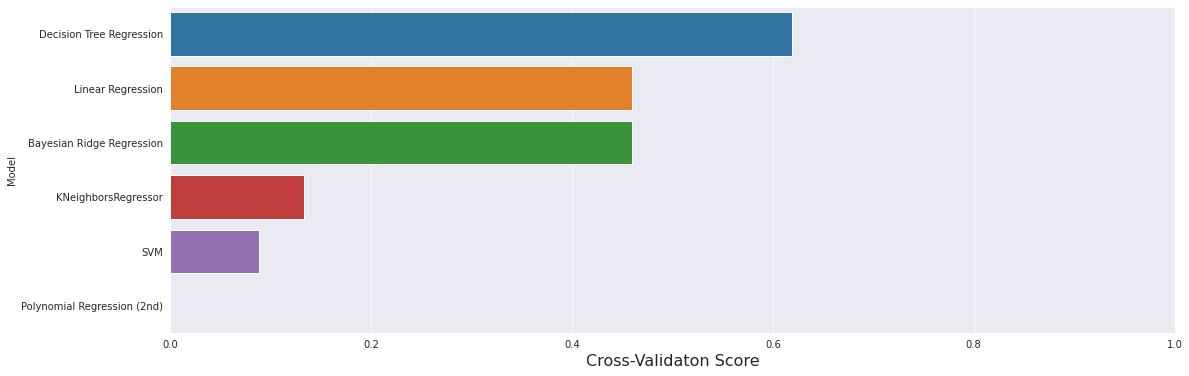

In [ ]:
# visualizanto como gráfico

f, axe = plt.subplots(1,1, figsize=(18,6))

predict.sort_values(by=['Cross-Validation'], ascending=False, inplace=True)

sns.barplot(x='Cross-Validation', y='Model', data = predict, ax = axe)
axe.set_xlabel('Cross-Validaton Score', size=16)
axe.set_ylabel('Model')
axe.set_xlim(0,1.0)
plt.show()

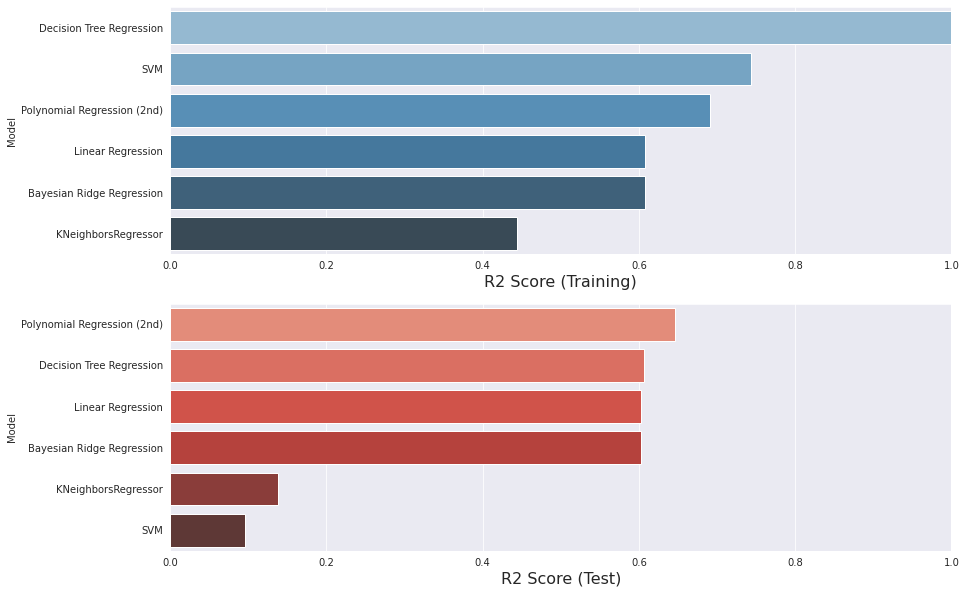

In [ ]:
f, axes = plt.subplots(2,1, figsize=(14,10))

predict.sort_values(by=['R2_Score(train)'], ascending=False, inplace=True)

sns.barplot(x='R2_Score(train)', y='Model', data = predict, palette='Blues_d', ax = axes[0])
axes[0].set_xlabel('R2 Score (Training)', size=16)
axes[0].set_ylabel('Model')
axes[0].set_xlim(0,1.0)

predict.sort_values(by=['R2_Score(test)'], ascending=False, inplace=True)

sns.barplot(x='R2_Score(test)', y='Model', data = predict, palette='Reds_d', ax = axes[1])
axes[1].set_xlabel('R2 Score (Test)', size=16)
axes[1].set_ylabel('Model')
axes[1].set_xlim(0,1.0)

plt.show()

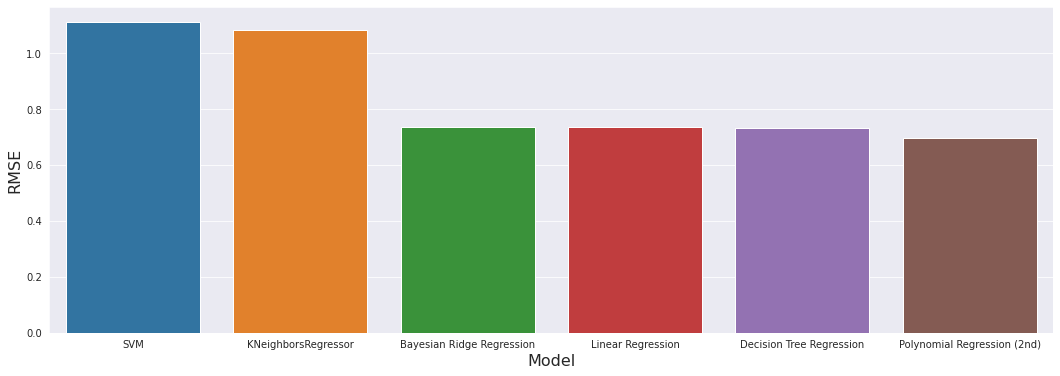

In [ ]:
predict.sort_values(by=['RMSE'], ascending=False, inplace=True)

f, axe = plt.subplots(1,1, figsize=(18,6))
sns.barplot(x='Model', y='RMSE', data=predict, ax = axe)
axe.set_xlabel('Model', size=16)
axe.set_ylabel('RMSE', size=16)

plt.show()